In [20]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
from gensim.models import word2vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import pickle

pickle_file = open("C:\\Users\\snigd\\forTSNE_Data_Cleaned_08092020_083631.df",'rb')
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df

pickle_data = pickle.load(pickle_file)
df = pd.DataFrame(pickle_data)

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df.head(5)

0                           Org   OrgSector   RverMonthYear RverReviewer  \
1  Instone Real Estate Group AG  Immobilien        May 2020            3   
2  Instone Real Estate Group AG  Immobilien    October 2019            4   
3  Instone Real Estate Group AG  Immobilien    October 2019            5   
4  Instone Real Estate Group AG  Immobilien  September 2019            6   
5  Instone Real Estate Group AG  Immobilien     August 2019            8   

0                       RverPosition  \
1     Angestellte/r oder Arbeiter/in   
2  Ex-Angestellte/r oder Arbeiter/in   
3         Führungskraft / Management   
4     Angestellte/r oder Arbeiter/in   
5     Angestellte/r oder Arbeiter/in   

0                                            RverLoc        RverRecom  \
1  Hat zum Zeitpunkt der Bewertung im Bereich Adm...        Empfohlen   
2  Hat im Bereich Personal / Aus- und Weiterbildu...  Nicht empfohlen   
3  Hat zum Zeitpunkt der Bewertung bei Instone Re...        Empfohlen   
4  Hat zum Zeitpunkt der Bewertung im Bereich Bes...        Empfohlen   
5  Hat zum Zeitpunkt der Bewertung bei Instone Re...        Empfohlen   

0 RvReviewAbout RvScore                                          RvComment  \
1       Overall     4.5   Wenn Transparenz und Wertschätzung aufeinande...   
2       Overall     3.2   Anspruch und Wirklichkeit klaffen auseinander...   
3       Overall     4.8   Toller Arbeitgeber  Tolle Truppe  Auch bei lä...   
4       Overall     4.6   Glücksfall - vom Konzern zum Mittelstand! Ang...   
5       Overall     4.5   100% Zufriedenheit Neue sinnvolle Wege zum Zi...   

0  ...    topic15    topic16    topic17    topic18    topic19    topic20  \
1  ...          0   0.112077   0.137255          0  0.0718944   0.202615   
2  ...          0          0          0          0   0.177839          0   
3  ...  0.0107527  0.0107555  0.0107544  0.0107529  0.0107528  0.0107534   
4  ...   0.185833          0          0          0          0          0   
5  ...  0.0973077          0          0          0          0          0   

0    topic21    topic22 forTSNEYear                forTSNECity  
1          0          0        2020  Köln, Nordrhein-Westfalen  
2          0          0        2019       Essen, Niedersachsen  
3  0.0107527  0.0107532        2019       Essen, Niedersachsen  
4          0          0        2019       Essen, Niedersachsen  
5          0  0.0973475        2019             Berlin, Berlin  

[5 rows x 44 columns]

In [22]:
df['forTSNECity'].value_counts()

München, Bayern                764
NA                             649
Berlin, Berlin                 553
Hamburg, Hamburg               338
Frankfurt, Brandenburg         329
                              ... 
Burgbernheim, Bayern             1
Höxter, Nordrhein-Westfalen      1
Harzgerode, Sachsen-Anhalt       1
Bamberg, Bayern                  1
Schönefeld, Brandenburg          1
Name: forTSNECity, Length: 315, dtype: int64

In [23]:
df.loc[((df.forTSNECity == 'NA')), 'forTSNECity'] = 'NA,NA'

In [45]:
def Tsne_State(location):
    #location = 'Essen, Niedersachsen'
    locationAsList = location.split(",")
    return locationAsList[1].strip()

df['forTSNEState'] = df['forTSNECity'].apply(Tsne_State)

In [46]:
df.shape

(7062, 47)

In [47]:
df.columns

Index(['Org', 'OrgSector', 'RverMonthYear', 'RverReviewer', 'RverPosition',
       'RverLoc', 'RverRecom', 'RvReviewAbout', 'RvScore', 'RvComment',
       'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues',
       'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues',
       'RvScoreEnvironmentalSocialAwareness', 'Corona1', 'Corona2', 'Corona3',
       'RvScoreWorkLifeBalance', 'topic0', 'topic1', 'topic2', 'topic3',
       'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10',
       'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16',
       'topic17', 'topic18', 'topic19', 'topic20', 'topic21', 'topic22',
       'forTSNEYear', 'forTSNECity', 'x_axis', 'y_axis', 'forTSNEState'],
      dtype='object', name=0)

In [50]:
df.describe(include = 'all' )

0                    Org  OrgSector RverMonthYear RverReviewer  \
count               7062       7062          7062         7062   
unique               141         32           118           10   
top     Deutsche Post AG  Industrie      May 2020            4   
freq                 342       1078           462          789   
mean                 NaN        NaN           NaN          NaN   
std                  NaN        NaN           NaN          NaN   
min                  NaN        NaN           NaN          NaN   
25%                  NaN        NaN           NaN          NaN   
50%                  NaN        NaN           NaN          NaN   
75%                  NaN        NaN           NaN          NaN   
max                  NaN        NaN           NaN          NaN   

0                         RverPosition RverLoc  RverRecom RvReviewAbout  \
count                             7062    7062       7062          7062   
unique                              14    4966          3             1   
top     Angestellte/r oder Arbeiter/in          Empfohlen       Overall   
freq                              4094      27       3497          7062   
mean                               NaN     NaN        NaN           NaN   
std                                NaN     NaN        NaN           NaN   
min                                NaN     NaN        NaN           NaN   
25%                                NaN     NaN        NaN           NaN   
50%                                NaN     NaN        NaN           NaN   
75%                                NaN     NaN        NaN           NaN   
max                                NaN     NaN        NaN           NaN   

0      RvScore                                          RvComment  ...  \
count     7062                                               7062  ...   
unique      41                                               6716  ...   
top        4.5   Ich bin zufrieden mit der umgebung und der la...  ...   
freq       457                                                  4  ...   
mean       NaN                                                NaN  ...   
std        NaN                                                NaN  ...   
min        NaN                                                NaN  ...   
25%        NaN                                                NaN  ...   
50%        NaN                                                NaN  ...   
75%        NaN                                                NaN  ...   
max        NaN                                                NaN  ...   

0      topic18 topic19 topic20 topic21 topic22  forTSNEYear      forTSNECity  \
count   7062.0  7062.0  7062.0  7062.0  7062.0  7062.000000             7062   
unique  2916.0  3545.0  2494.0  1966.0  3617.0          NaN              315   
top        0.0     0.0     0.0     0.0     0.0          NaN  München, Bayern   
freq    2661.0  2311.0  2716.0  2734.0  2301.0          NaN              764   
mean       NaN     NaN     NaN     NaN     NaN  2017.465449              NaN   
std        NaN     NaN     NaN     NaN     NaN     2.477117              NaN   
min        NaN     NaN     NaN     NaN     NaN  2010.000000              NaN   
25%        NaN     NaN     NaN     NaN     NaN  2016.000000              NaN   
50%        NaN     NaN     NaN     NaN     NaN  2018.000000              NaN   
75%        NaN     NaN     NaN     NaN     NaN  2019.000000              NaN   
max        NaN     NaN     NaN     NaN     NaN  2020.000000              NaN   

0            x_axis       y_axis  forTSNEState  
count   7061.000000  7061.000000          7062  
unique          NaN          NaN            17  
top             NaN          NaN        Bayern  
freq            NaN          NaN          1607  
mean       0.644642     0.466110           NaN  
std       33.303612    30.379049           NaN  
min      -69.446198   -61.385586           NaN  
25%      -22.756868   -24.311459           NaN  
50%       -0.42

In [87]:
df_1 = df[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic13','topic14','topic15','topic16','topic17','topic18','topic19','topic21']] ##Eliminate topic12, topic20, topic22
df_1.head(5)

0     topic0     topic1     topic2     topic3     topic4   topic5     topic6  \
1          0  0.0719539          0          0          0        0          0   
2          0          0   0.111966          0          0        0  0.0791194   
3  0.0107534   0.010753  0.0107565   0.225807  0.0107529  0.11828  0.0107529   
4          0          0   0.279318          0          0        0          0   
5          0          0          0  0.0973803          0        0          0   

0     topic7     topic8     topic9    topic10    topic11    topic13  \
1   0.227733  0.0718945          0          0          0          0   
2          0  0.0769237  0.0865086   0.279106          0          0   
3  0.0107527  0.0107542   0.010755   0.440842  0.0107528  0.0107536   
4          0          0   0.173298          0   0.100221          0   
5    0.27464          0          0  0.0973374   0.185531          0   

0    topic14    topic15    topic16    topic17    topic18    topic19    topic21  
1          0          0   0.112077   0.137255          0  0.0718944          0  
2  0.0766401          0          0          0          0   0.177839          0  
3  0.0107528  0.0107527  0.0107555  0.0107544  0.0107529  0.0107528  0.0107527  
4   0.102011   0.185833          0          0          0          0          0  
5          0  0.0973077          0          0          0          0          0

In [88]:
df_1.columns

Index(['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic13',
       'topic14', 'topic15', 'topic16', 'topic17', 'topic18', 'topic19',
       'topic21'],
      dtype='object', name=0)

In [93]:
for i in range(0, 23):
    if i in [12, 20, 22]:
        continue
    col_name = 'topic' + str(i)
    df_1[col_name] = df_1[col_name].astype(float)
    
    
df_1.dtypes

0
topic0     float64
topic1     float64
topic2     float64
topic3     float64
topic4     float64
topic5     float64
topic6     float64
topic7     float64
topic8     float64
topic9     float64
topic10    float64
topic11    float64
topic13    float64
topic14    float64
topic15    float64
topic16    float64
topic17    float64
topic18    float64
topic19    float64
topic21    float64
dtype: object

In [94]:
result = df_1.to_numpy() 
result

array([[0.        , 0.07195388, 0.        , ..., 0.        , 0.07189436,
        0.        ],
       [0.        , 0.        , 0.11196589, ..., 0.        , 0.17783938,
        0.        ],
       [0.01075339, 0.01075303, 0.01075646, ..., 0.01075288, 0.01075284,
        0.01075272],
       ...,
       [0.29896811, 0.        , 0.        , ..., 0.        , 0.06144007,
        0.        ],
       [0.        , 0.        , 0.44754827, ..., 0.        , 0.        ,
        0.0769219 ],
       [0.01587405, 0.01587353, 0.01587307, ..., 0.01587331, 0.01587324,
        0.01587307]])

In [95]:
display(result.shape)

(7062, 20)

In [96]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=70, learning_rate=600, n_iter=2000, verbose=1, random_state=7, angle=.5, init='pca')
# 18-D -> 2-D #22-D -> 2-D
tsne_lda = tsne_model.fit_transform(result) # result is document-topic matrix from LDA

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 7062 samples in 0.064s...
[t-SNE] Computed neighbors for 7062 samples in 5.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7062
[t-SNE] Computed conditional probabilities for sample 2000 / 7062
[t-SNE] Computed conditional probabilities for sample 3000 / 7062
[t-SNE] Computed conditional probabilities for sample 4000 / 7062
[t-SNE] Computed conditional probabilities for sample 5000 / 7062
[t-SNE] Computed conditional probabilities for sample 6000 / 7062
[t-SNE] Computed conditional probabilities for sample 7000 / 7062
[t-SNE] Computed conditional probabilities for sample 7062 / 7062
[t-SNE] Mean sigma: 0.099806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.745827
[t-SNE] KL divergence after 2000 iterations: 1.629688


In [97]:
#tsne_docXtopic.dtype
#tsne_docXtopic_dataframe = pd.DataFrame(tsne_docXtopic)
tsne_topic_dataframe = pd.DataFrame(tsne_lda)
#--------tsne_topic_dataframe['OrgSector'] = df['OrgSector']
#tsne_topic_dataframe['OrgSector'] = pd['OrgSector']
#tsne_docXtopic_dataframe
#tsne_topic_dataframe.shape
df_copy = df

In [98]:
tsne_topic_dataframe.shape

(7062, 2)

In [99]:
tsne_topic_dataframe.head(3)

0          1
0   2.959569 -54.959446
1  26.573328   0.010590
2  56.496948   6.143377

In [100]:
tsne_topic_dataframe_copy = tsne_topic_dataframe.copy()
#tsne_topic_dataframe.shape
#tsne_topic_dataframe.tail(2)
#top_row = pd.DataFrame({0:['delete'],1:['delete2']})
#top_row
#tsne_topic_dataframe_copy = pd.concat([top_row, tsne_topic_dataframe_copy]).reset_index(drop = True)
tsne_topic_dataframe_copy

0          1
0      2.959569 -54.959446
1     26.573328   0.010590
2     56.496948   6.143377
3    -38.898758  -9.301376
4     21.522322 -41.172882
...         ...        ...
7057  -4.609421  36.368019
7058  -2.080934  -2.491823
7059 -41.120739 -45.555004
7060  34.106396 -24.389896
7061  71.132057   9.318213

[7062 rows x 2 columns]

In [101]:
df_copy.head(2)
#df_copy.shape
df_copy.tail(2)

0                        Org                      OrgSector RverMonthYear  \
7061  KWS SAAT SE & Co. KGaA  Nahrungsmittel/Landwirtschaft  October 2015   
7062  KWS SAAT SE & Co. KGaA  Nahrungsmittel/Landwirtschaft     June 2015   

0    RverReviewer                    RverPosition  \
7061            8  Angestellte/r oder Arbeiter/in   
7062           10  Angestellte/r oder Arbeiter/in   

0                                               RverLoc        RverRecom  \
7061  Hat zum Zeitpunkt der Bewertung im Bereich IT ...  Nicht empfohlen   
7062  Hat zum Zeitpunkt der Bewertung bei KWS SAAT A...                    

0    RvReviewAbout RvScore                                          RvComment  \
7061       Overall     2.2   Schwieriges Betriebsklima in der IT, mehr Sch...   
7062       Overall     4.9   sehr viel Freiheit gutes Betriebsklima locker...   

0     ...    topic18    topic19    topic20    topic21    topic22 forTSNEYear  \
7061  ...          0          0          0  0.0769219          0        2015   
7062  ...  0.0158733  0.0158732  0.0158733  0.0158731  0.0158747        2015   

0                forTSNECity     x_axis     y_axis   forTSNEState  
7061  Einbeck, Niedersachsen  62.467735  25.237951  Niedersachsen  
7062  Einbeck, Niedersachsen        NaN        NaN  Niedersachsen  

[2 rows x 47 columns]

In [102]:
tsne_topic_dataframe_copy[0].head(3)

0     2.959569
1    26.573328
2    56.496948
Name: 0, dtype: float32

In [103]:
tsne_topic_dataframe_copy[1].head(3)

0   -54.959446
1     0.010590
2     6.143377
Name: 1, dtype: float32

In [104]:
df_copy['x_axis']=tsne_topic_dataframe_copy[0]
df_copy['y_axis']=tsne_topic_dataframe_copy[1]

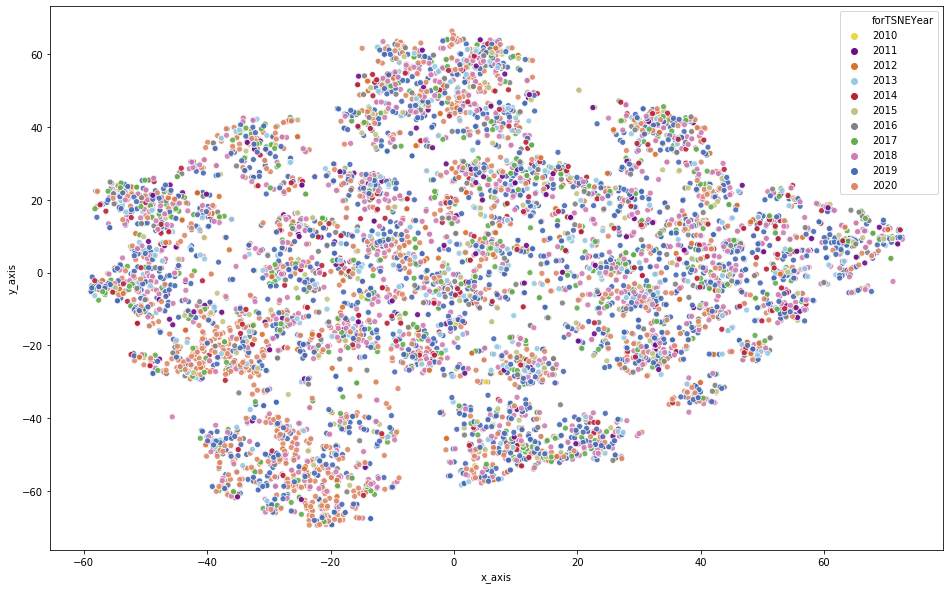

In [121]:
# reviews and forTSNEYear
plt.figure(figsize=(16,10))

colors = ["#ead844", "#6e0a87", "#d9722e", "#97cae4", "#b92138", "#c3c484", "#808281", "#61ae4b", "#cf7eb2", "#476bb5", "#dd8969", "#481191", "#dcab35", "#92008c", "#e6f55e", "#7d1a13", "#93b841", "#6e3715", "#d0322a", "#2b3919"]
colors2 = colors[:df_copy['forTSNEYear'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['forTSNEYear'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEYear'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

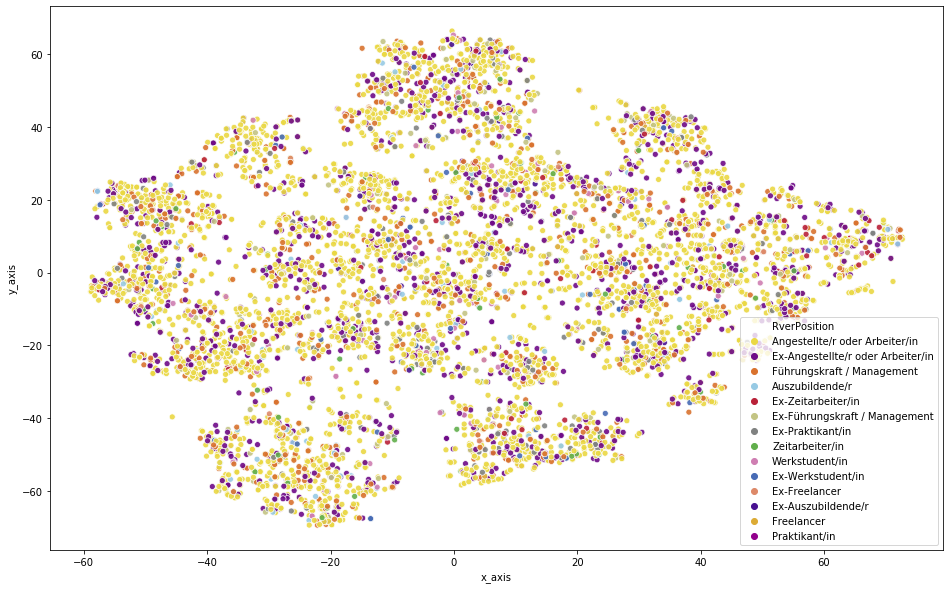

In [106]:
# reviews and RverPosition
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RverPosition'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RverPosition'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('icefire',df_copy['RverPosition'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

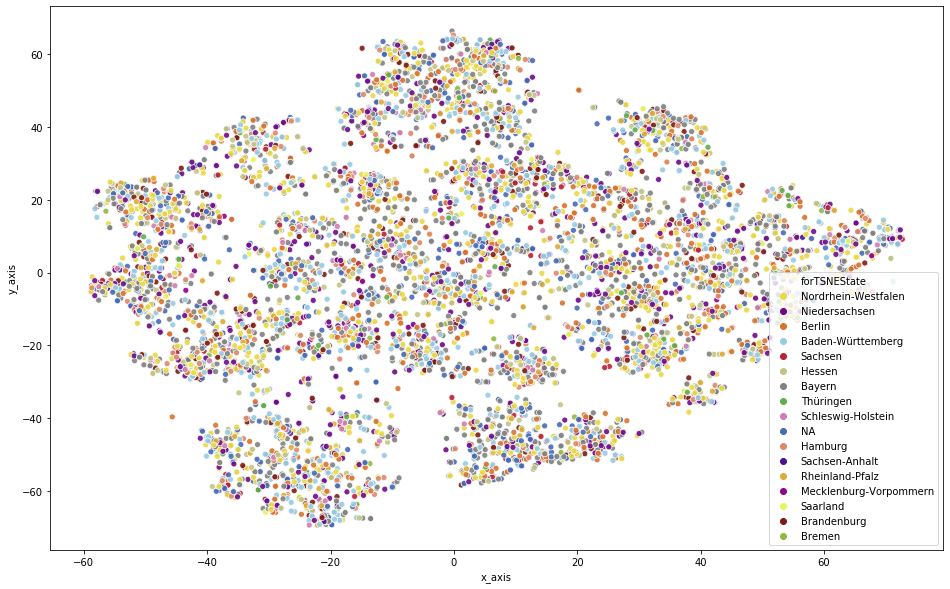

In [107]:
# reviews and forTSNEState
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['forTSNEState'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['forTSNEState'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEState'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

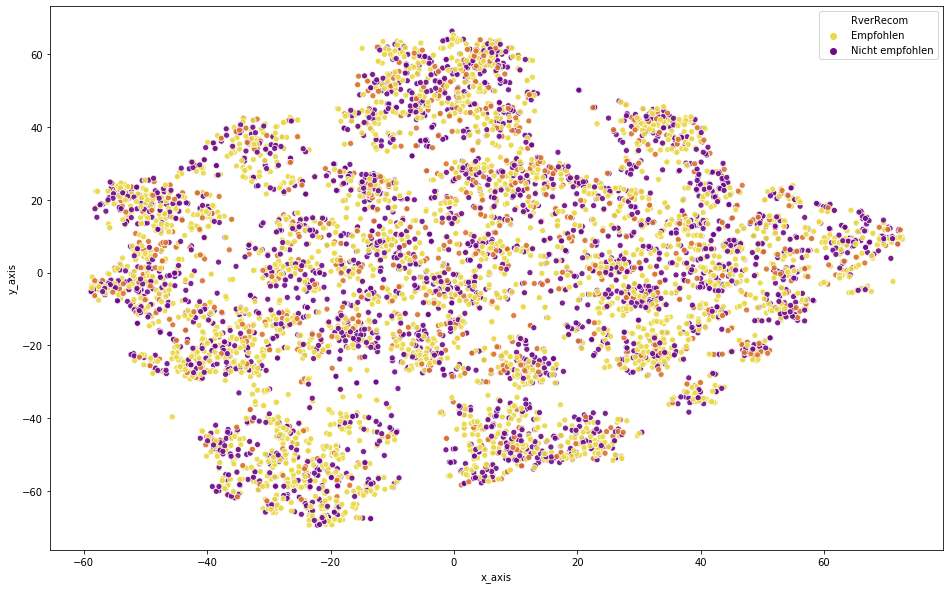

In [119]:
# reviews and RverRecom
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RverRecom'].nunique()]


sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RverRecom'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RverRecom'].nunique())
    palette= sns.color_palette(colors2)
)
#sns.palplot(sns.color_palette("RdBu", 10))

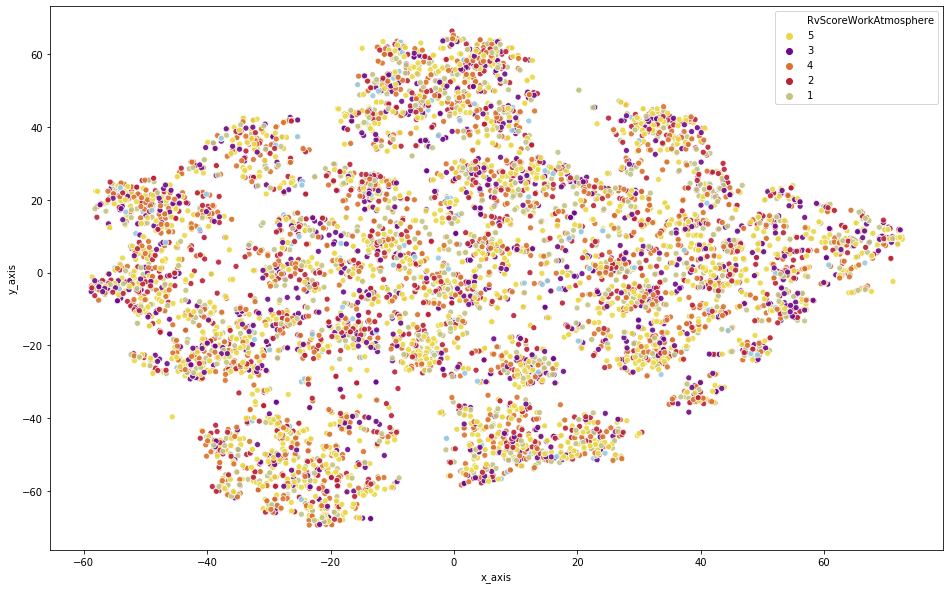

In [109]:
# reviews and RvScoreWorkAtmosphere 
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreWorkAtmosphere'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreWorkAtmosphere'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreWorkAtmosphere'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

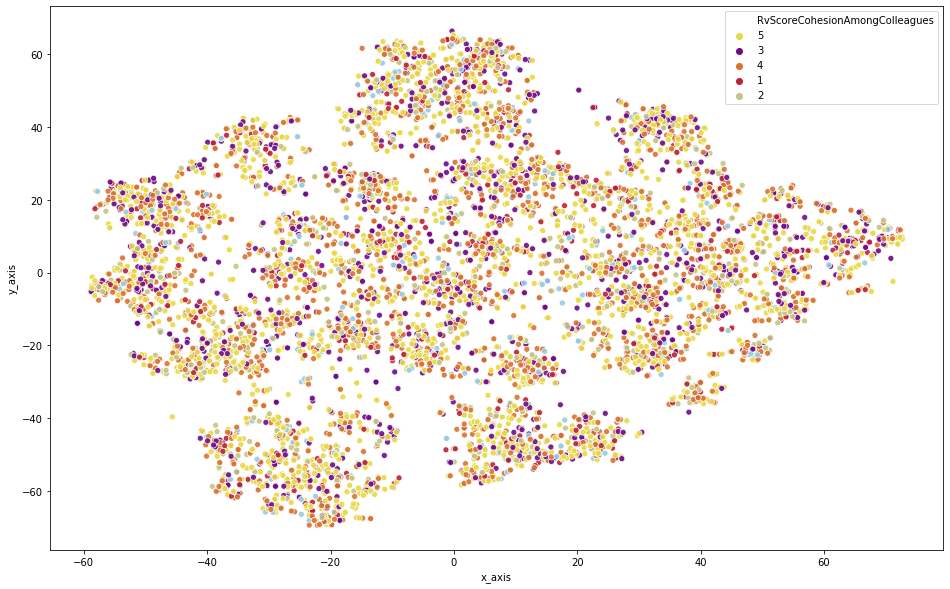

In [110]:
# reviews and RvScoreCohesionAmongColleagues 
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreCohesionAmongColleagues'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreCohesionAmongColleagues'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreCohesionAmongColleagues'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

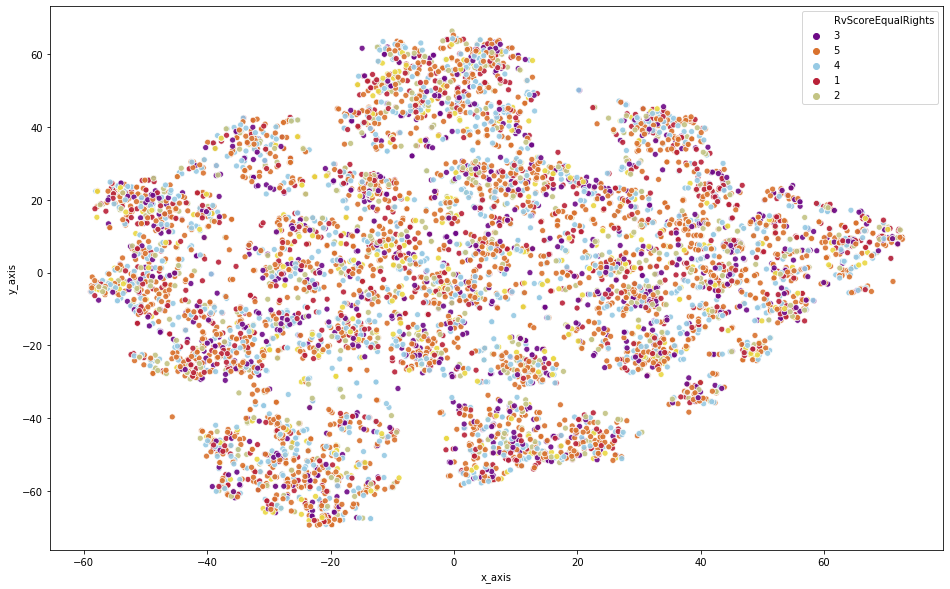

In [111]:
# reviews and RvScoreEqualRights
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreEqualRights'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreEqualRights'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreEqualRights'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

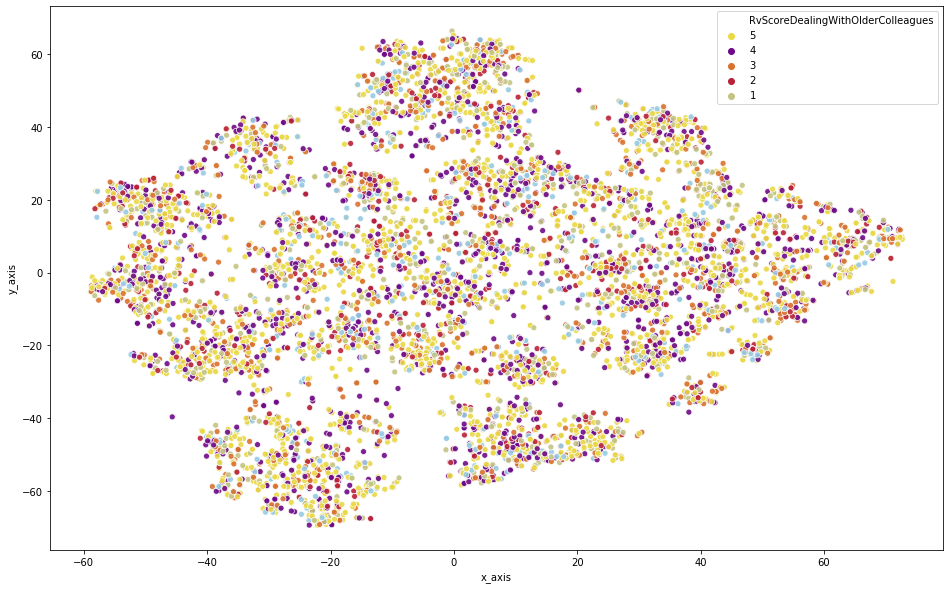

In [112]:
# reviews and RvScoreDealingWithOlderColleagues
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreDealingWithOlderColleagues'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreDealingWithOlderColleagues'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreDealingWithOlderColleagues'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

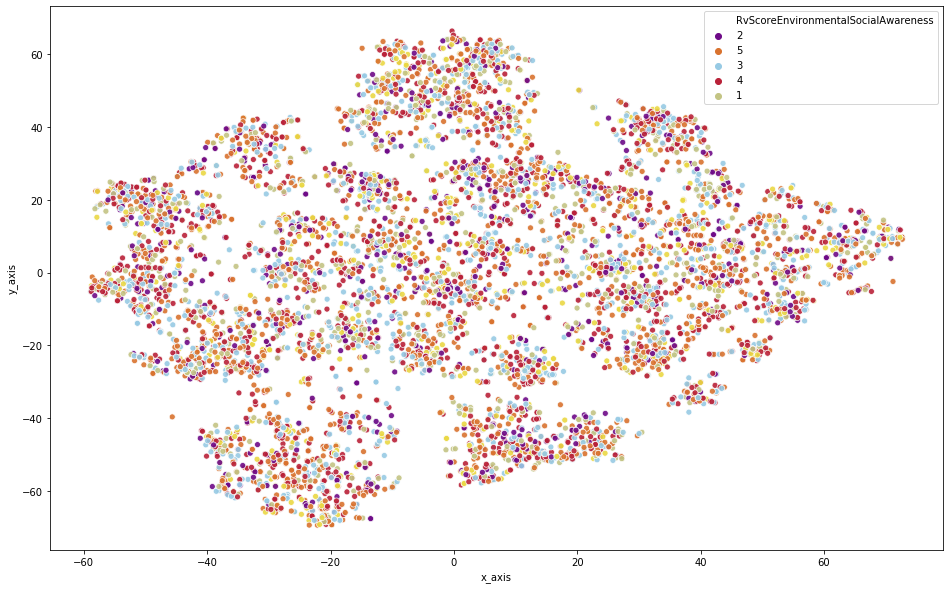

In [113]:
# reviews and RvScoreEnvironmentalSocialAwareness
        
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreEnvironmentalSocialAwareness'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreEnvironmentalSocialAwareness'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreEnvironmentalSocialAwareness'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

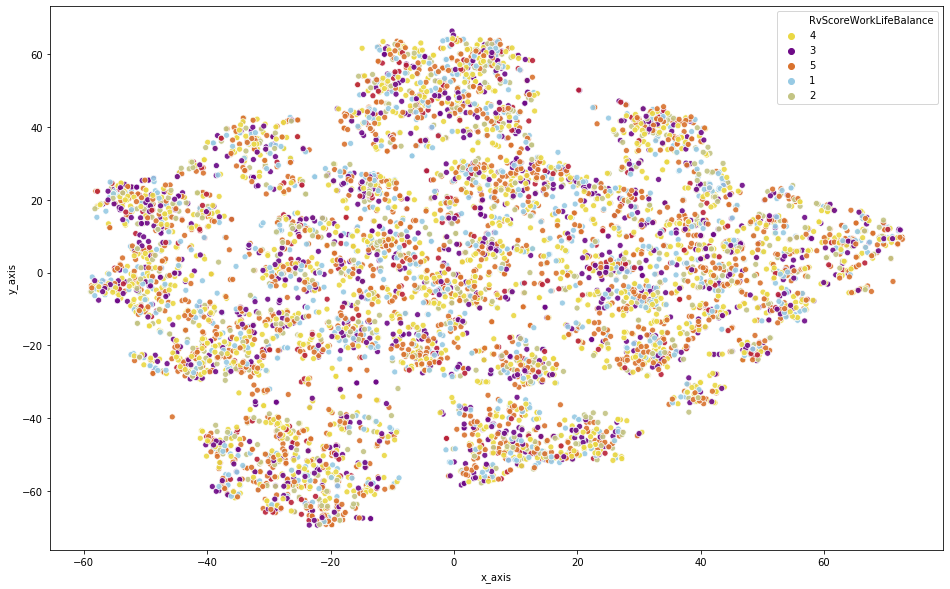

In [124]:
# reviews and RvScoreWorkLifeBalance
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreWorkLifeBalance'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreWorkLifeBalance'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreWorkLifeBalance'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))